In [ ]:
# for manipulating dataframes
import pandas as pd
import matplotlib.pyplot as plt
# for natural language processing: named entity recognition
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
# for visualizations
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('Landslide2009-2020 (2).csv')
df

,Unnamed: 0,Description,Date,Address,"Latitude,Longitude",Pin code,Latitude,Longitude
0,0,1\n \n| \nC\nompiled by \nGSI\n \n \nLandslide...,NaN,.,.,NaN,0.000000,0.000000
1,1,Landslide incidence in Himachal Pradesh \n\n \...,2015-12-07,"Mandi, Himachal Pradesh, India","(31.6723392, 76.95331690779145)",NaN,31.672339,76.953317
2,2,Landslide incidence in Jammu & Kashmir \n\n \n...,2015-09-22,"Jammu, Jammu District, Jammu and Kashmir, 1800...","(32.7185614, 74.8580917)",180001.0,32.718561,74.858092
3,3,Landslide incidence in Mizoram \n\n \n27 Augus...,2015-08-27,.,.,NaN,0.000000,0.000000
4,4,Landslide incidence in Himach\nal Pradesh \n\n...,2015-08-18,.,.,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...
219,219,NaN,NaN,.,.,NaN,0.000000,0.000000
220,220,Landslide incidence in Sikkim - 14 January 201...,2016-01-14,.,.,NaN,0.000000,0.000000
221,221,Landslide incidence in Karimgang and Hilakan...,2016-05-18,.,.,NaN,0.000000,0.000000
222,222,"Landslide incidence in Tawang, Arunachal Prade...",2016-05-18,.,.,NaN,0.000000,0.000000


In [ ]:
tokens = nlp(''.join(str(df.Description.tolist())))

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items)

Counter({'\\nGSI\\n': 14,
         'the year': 2,
         'Himachal Pradesh': 6,
         'December': 2,
         '7/12/2015': 2,
         'about 0830 hrs': 1,
         '\\nThe': 9,
         '5/12/2015': 1,
         '8/12/2015 early hours': 1,
         '9/2/2015': 1,
         'GSI': 4,
         '\\ninvestigation': 1,
         '8/12/2015': 1,
         'Jammu & Kashmir': 11,
         'September': 13,
         'the Jammu Srinagar N\\national Highway': 1,
         '\\nfollowing': 2,
         'Mizoram \\n\\n': 1,
         'August': 18,
         'three': 25,
         '\\n70': 1,
         'two': 49,
         'Aizawl Town': 1,
         'Mizoram': 7,
         'Aizawl': 3,
         '\\nlandslides': 5,
         'Sikh': 1,
         'Gurdwara Manikaran Sahib': 1,
         'Himachal': 22,
         'at least ten': 1,
         'Gurdwara \\nManikaran Sahib': 1,
         '\\nlandslide': 3,
         'Manipur \\n\\n': 1,
         'at least 20': 1,
         'J\\nammu & Kashmir \\n\\n': 1,
         'July':

In [ ]:
location_list = []
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        location_list.append(ent.text)
        
location_counts = Counter(location_list).most_common(20)
df_location = pd.DataFrame(location_counts, columns =['Location', 'count'])

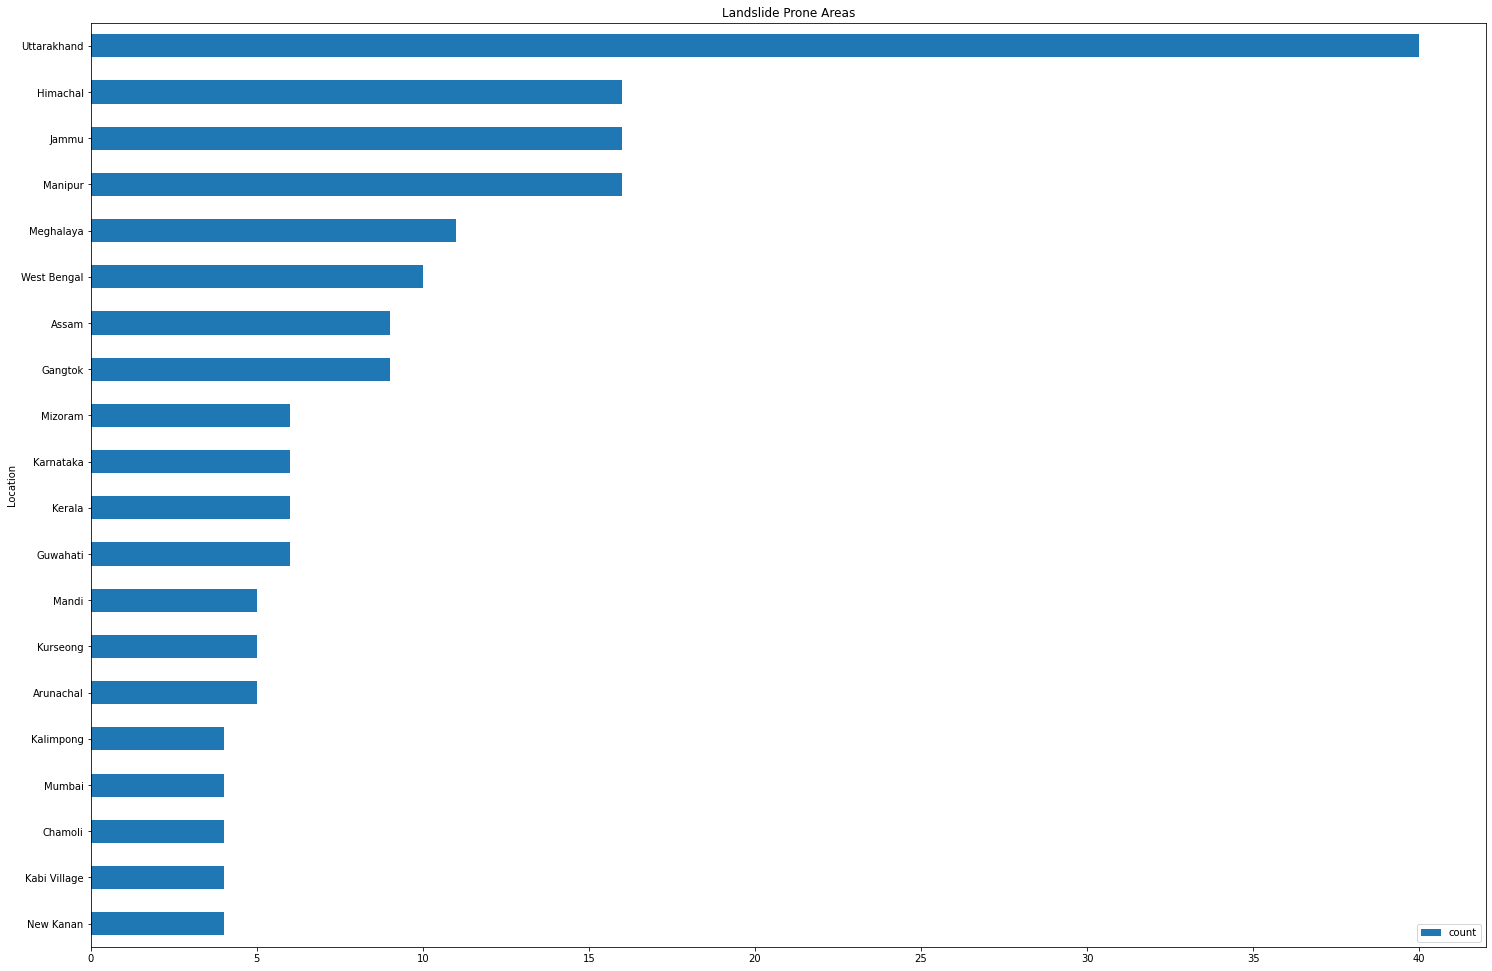

In [ ]:
df_location.plot.barh(x='Location', y='count', title="Landslide Prone Areas", figsize=(25,17)).invert_yaxis()
# Visualizing at district/village levels.

In [ ]:
locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)

224

In [ ]:
import folium
map = folium.Map(location=[20.5937,78.9629], zoom_start=5)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup = df['Address'][point]).add_to(map)
map

In [ ]:
import datetime 
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Unnamed: 0,Description,Date,Address,"Latitude,Longitude",Pin code,Latitude,Longitude,Year
0,0,1\n \n| \nC\nompiled by \nGSI\n \n \nLandslide...,NaN,.,.,NaN,0.000000,0.000000,NaN
1,1,Landslide incidence in Himachal Pradesh \n\n \...,2015-12-07,"Mandi, Himachal Pradesh, India","(31.6723392, 76.95331690779145)",NaN,31.672339,76.953317,2015.0
2,2,Landslide incidence in Jammu & Kashmir \n\n \n...,2015-09-22,"Jammu, Jammu District, Jammu and Kashmir, 1800...","(32.7185614, 74.8580917)",180001.0,32.718561,74.858092,2015.0
3,3,Landslide incidence in Mizoram \n\n \n27 Augus...,2015-08-27,.,.,NaN,0.000000,0.000000,2015.0
4,4,Landslide incidence in Himach\nal Pradesh \n\n...,2015-08-18,.,.,NaN,0.000000,0.000000,2015.0
...,...,...,...,...,...,...,...,...,...
219,219,NaN,NaN,.,.,NaN,0.000000,0.000000,NaN
220,220,Landslide incidence in Sikkim - 14 January 201...,2016-01-14,.,.,NaN,0.000000,0.000000,2016.0
221,221,Landslide incidence in Karimgang and Hilakan...,2016-05-18,.,.,NaN,0.000000,0.000000,2016.0
222,222,"Landslide incidence in Tawang, Arunachal Prade...",2016-05-18,.,.,NaN,0.000000,0.000000,2016.0


In [ ]:
count_year = df['Year'].value_counts(dropna=False)

In [ ]:
data= df['Year']
data

0         NaN
1      2015.0
2      2015.0
3      2015.0
4      2015.0
        ...  
219       NaN
220    2016.0
221    2016.0
222    2016.0
223    2016.0
Name: Year, Length: 224, dtype: float64

In [ ]:
data = df.groupby(["Year"])["Year"].count().reset_index(name="count")
data

,Year,count
0,2009.0,33
1,2010.0,78
2,2011.0,6
3,2013.0,1
4,2014.0,5
5,2015.0,15
6,2016.0,4
7,2017.0,12
8,2018.0,25
9,2019.0,10


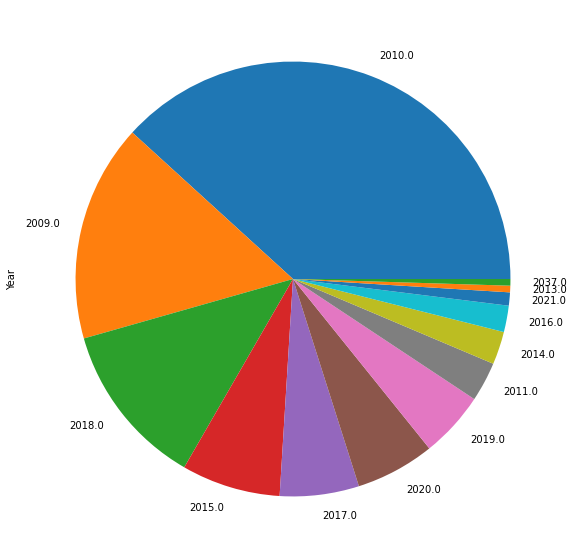

In [ ]:
df['Year'].value_counts().plot(kind='pie', figsize=(20,10))

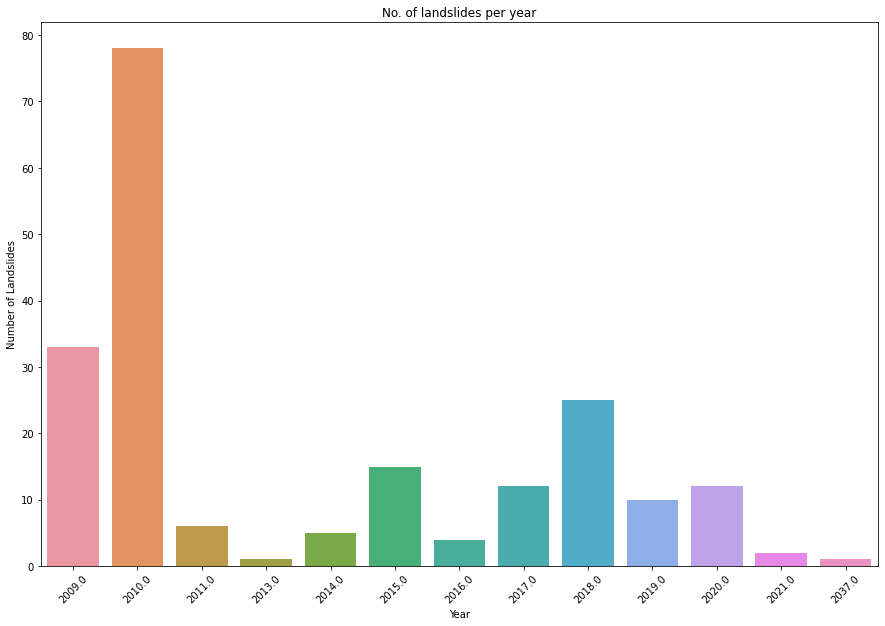

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['Year'], y=data['count'])
plt.xlabel('Year')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45)
plt.title('No. of landslides per year')
plt.show()

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df

,Unnamed: 0,Description,Date,Address,"Latitude,Longitude",Pin code,Latitude,Longitude,Year,Month
0,0,1\n \n| \nC\nompiled by \nGSI\n \n \nLandslide...,NaN,.,.,NaN,0.000000,0.000000,NaN,NaN
1,1,Landslide incidence in Himachal Pradesh \n\n \...,2015-12-07,"Mandi, Himachal Pradesh, India","(31.6723392, 76.95331690779145)",NaN,31.672339,76.953317,2015.0,12.0
2,2,Landslide incidence in Jammu & Kashmir \n\n \n...,2015-09-22,"Jammu, Jammu District, Jammu and Kashmir, 1800...","(32.7185614, 74.8580917)",180001.0,32.718561,74.858092,2015.0,9.0
3,3,Landslide incidence in Mizoram \n\n \n27 Augus...,2015-08-27,.,.,NaN,0.000000,0.000000,2015.0,8.0
4,4,Landslide incidence in Himach\nal Pradesh \n\n...,2015-08-18,.,.,NaN,0.000000,0.000000,2015.0,8.0
...,...,...,...,...,...,...,...,...,...,...
219,219,NaN,NaN,.,.,NaN,0.000000,0.000000,NaN,NaN
220,220,Landslide incidence in Sikkim - 14 January 201...,2016-01-14,.,.,NaN,0.000000,0.000000,2016.0,1.0
221,221,Landslide incidence in Karimgang and Hilakan...,2016-05-18,.,.,NaN,0.000000,0.000000,2016.0,5.0
222,222,"Landslide incidence in Tawang, Arunachal Prade...",2016-05-18,.,.,NaN,0.000000,0.000000,2016.0,5.0


In [ ]:
df_month = df['Month'].dropna()
df_month.column = ['Month']
df_month


1      12.0
2       9.0
3       8.0
4       8.0
5       8.0
       ... 
218     7.0
220     1.0
221     5.0
222     5.0
223     5.0
Name: Month, Length: 204, dtype: float64

In [ ]:
data = df.groupby(["Month"])["Month"].count().reset_index(name="count")
data

,Month,count
0,1.0,3
1,2.0,10
2,3.0,7
3,4.0,10
4,5.0,24
5,6.0,33
6,7.0,43
7,8.0,40
8,9.0,14
9,10.0,11


In [ ]:
import calendar
data['Month_Name']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in data['Month']]
data

,Month,count,Month_Name
0,1.0,3,Jan
1,2.0,10,Feb
2,3.0,7,Mar
3,4.0,10,Apr
4,5.0,24,May
5,6.0,33,Jun
6,7.0,43,Jul
7,8.0,40,Aug
8,9.0,14,Sep
9,10.0,11,Oct


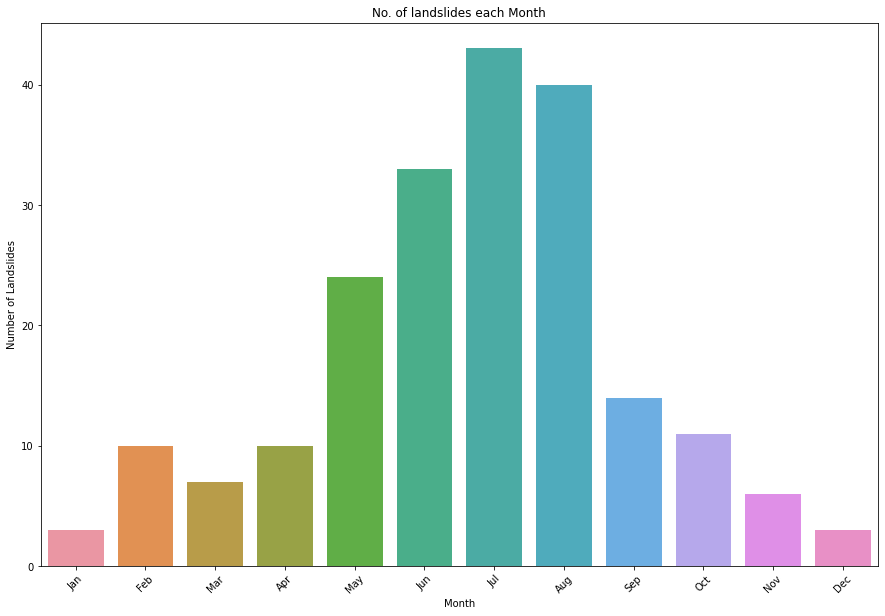

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=data['Month_Name'], y=data['count'])
plt.xlabel('Month')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45)
plt.title('No. of landslides each Month')
plt.show()

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0MB 11.5MB/s 
     |████████████████████████████████| 15.4MB 187kB/s 
     |████████████████████████████████| 6.6MB 45.0MB/s 


In [ ]:
import geopandas
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Latitude, df.Longitude))
gdf

,Unnamed: 0,Description,Date,Address,"Latitude,Longitude",Pin code,Latitude,Longitude,Year,Month,geometry
0,0,1\n \n| \nC\nompiled by \nGSI\n \n \nLandslide...,NaN,.,.,NaN,0.000000,0.000000,NaN,NaN,POINT (0.00000 0.00000)
1,1,Landslide incidence in Himachal Pradesh \n\n \...,2015-12-07,"Mandi, Himachal Pradesh, India","(31.6723392, 76.95331690779145)",NaN,31.672339,76.953317,2015.0,12.0,POINT (31.67234 76.95332)
2,2,Landslide incidence in Jammu & Kashmir \n\n \n...,2015-09-22,"Jammu, Jammu District, Jammu and Kashmir, 1800...","(32.7185614, 74.8580917)",180001.0,32.718561,74.858092,2015.0,9.0,POINT (32.71856 74.85809)
3,3,Landslide incidence in Mizoram \n\n \n27 Augus...,2015-08-27,.,.,NaN,0.000000,0.000000,2015.0,8.0,POINT (0.00000 0.00000)
4,4,Landslide incidence in Himach\nal Pradesh \n\n...,2015-08-18,.,.,NaN,0.000000,0.000000,2015.0,8.0,POINT (0.00000 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...
219,219,NaN,NaN,.,.,NaN,0.000000,0.000000,NaN,NaN,POINT (0.00000 0.00000)
220,220,Landslide incidence in Sikkim - 14 January 201...,2016-01-14,.,.,NaN,0.000000,0.000000,2016.0,1.0,POINT (0.00000 0.00000)
221,221,Landslide incidence in Karimgang and Hilakan...,2016-05-18,.,.,NaN,0.000000,0.000000,2016.0,5.0,POINT (0.00000 0.00000)
222,222,"Landslide incidence in Tawang, Arunachal Prade...",2016-05-18,.,.,NaN,0.000000,0.000000,2016.0,5.0,POINT (0.00000 0.00000)


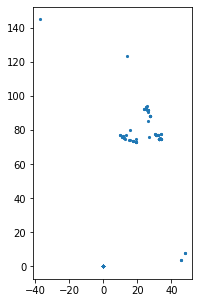

In [ ]:
gdf.plot(markersize = 4.5, figsize = (5,5))

In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
gdf.to_file(filename = 'Geo.shp', driver = 'ESRI Shapefile')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


<h3> <b> Conclusions Obtained : </b></h3> 


1. Major events were from <b>Uttrakhand</b>. 
2. Highest number of landslides recorded were in the year <b>2010</b>.
3. Major landslide incidence takes place in the month of <b>(July and August)</b> - Rainy Season.
